## load thư viện

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import cohen_kappa_score

import tensorflow
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import optimizers
from keras.optimizers import Adam
from tensorflow.keras import layers


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pickle
import seaborn as sns

from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords

import keras
import io
import requests
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from underthesea import word_tokenize

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from keras import backend as K

import codecs

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13217335444700476778
xla_global_id: -1
]


**XỬ LÍ TEXT CƠ BẢN**

In [3]:
import re
import os
import sys
# from Logger import LogEventSourcing
from datetime import datetime
import dateutil.parser
import traceback
import time
import requests


# logger = LogEventSourcing()

def call_api(data, url, method, timeout=3):
    headers = {
        'content-type': "application/x-www-form-urlencoded",
        'cache-control': "no-cache",
        'postman-token': "6a410524-a8e2-79c7-bd9d-53e4b68c84c7"
    }
    response = requests.request(method, url, data=data, headers=headers, timeout=timeout)
    return response


uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"


def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic


dicchar = loaddicchar()


def convertwindown1525toutf8(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

"""
    Start section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey
    Ví dụ: thủy = thuyr, tượng = tuwowngj
"""
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)


def vn_word_to_telex_type(word):
    dau_cau = 0
    new_word = ''
    for char in word:
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            new_word += char
            continue
        if y != 0:
            dau_cau = y
        new_word += bang_nguyen_am[x][-1]
    new_word += bang_ky_tu_dau[dau_cau]
    return new_word


def vn_sentence_to_telex_type(sentence):
    """
    Chuyển câu tiếng việt có dấu về kiểu gõ telex.
    :param sentence:
    :return:
    """
    words = sentence.split()
    for index, word in enumerate(words):
        words[index] = vn_word_to_telex_type(word)
    return ' '.join(words)


"""
    End section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey
"""

"""
    Start section: Chuyển câu văn về cách gõ dấu kiểu cũ: dùng òa úy thay oà uý
    Xem tại đây: https://vi.wikipedia.org/wiki/Quy_t%E1%BA%AFc_%C4%91%E1%BA%B7t_d%E1%BA%A5u_thanh_trong_ch%E1%BB%AF_qu%E1%BB%91c_ng%E1%BB%AF
"""


def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        words[index] = chuan_hoa_dau_tu_tieng_viet(word)
    return ' '.join(words)

In [4]:
import re
import string
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [5]:
def replace_acronym(text):
    text=" "+text+" "
    for i in [' o k ',' oki ',' oke ',' o ke ',' okay ',' okie ',' okey ',' okela ',' okila ',' okla ']:
        text=text.replace(i,' ok ')
        
    for i in [' k ',' kh ',' ko ',' khg ',' kg ',' khong ',' khôg ']:
        text=text.replace(i,' không ')
        
    for i in [' ktra ',' check ',' test ']:
        text=text.replace(i,' kiểm tra ')
        
    for i in [' đc ',' dc ',' đk ',' dk ',' đuoc ']:
        text=text.replace(i,' được ')
    
    for i in [' v ',' z ',' vây ']:
        text=text.replace(i,' vậy ')
        
    for i in[' cu ng ',' cx ']:
        text=text.replace(i,' cũng ')
    
    for i in[' vs ',' vơ i ',' vo i ']:
        text=text.replace(i,' với ')
        
    for i in[' mn ',' mng ',' mọi ng ']:
        text=text.replace(i,' mọi người ')
        
    for i in[' sp ',' sa n phâ m ',' san pham ']:
        text=text.replace(i,' sản phẩm ')
    
    for i in[' mh ',' mi nh ',' minh ',' mk ']:
        text=text.replace(i,' mình ')
     
    for i in[' tiki ',' shoppe ',' sope ',' shope ',' ti ki ',' soppe ']:
        text=text.replace(i,' ')
        
    for i in[' wa ',' qá ']:
        text=text.replace(i,' quá ')   
        
    for i in[' hàn ',' hàg ']:
        text=text.replace(i,' hàng ') 
    
    for i in[' tl ',' rep ']:
        text=text.replace(i,' trả lời ')
    
    for i in[' nhma ',' nhưg ',' nma ',' nhg ']:
        text=text.replace(i,' nhưng mà ') 
        
    text=text.replace(' j ',' gì ')
    text=text.replace(' sd ',' sử dụng ')
    text=text.replace(' trc ',' trước ')
    text=text.replace(' vn ',' việt nam ')
    text=text.replace(' sz ',' size ')
    text=text.replace(' sp ',' sản phẩm ')
    text=text.replace(' r ',' rồi ')
    text=text.replace(' rùi ',' rồi ')
    text=text.replace(' s ',' sao ')
    text=text.replace(' ms ',' mới ')
    text=text.replace(' nv ',' như vậy ')
    text=text.replace(' ntn ',' như thế nào ')
    text=text.replace(' đ ep ',' đẹp ').replace(' đep ',' đẹp ')
    text=text.replace(' thực sự ',' thật sự ')
    text=text.replace(' đu ng ',' đúng ')
    text=text.replace(' nao ',' nào ')
    text=text.replace(' sài ',' xài ')
    text=text.replace(' sơ xài ',' sơ sài ')
    text=text.replace(' ghn ',' giao hàng ')
    text=text.replace(' siu ',' siêu ')
    text=text.replace(' nge ',' nghe ')
    text=text.replace(' nch ',' nói chuyện ')
    text=text.replace(' ns ',' nói ')
    text=text.replace(' rì viu ',' review ')
    text=text.replace(' tot ',' tốt ')
    text=text.replace(' rát ',' rất ').replace(' rat ',' rất ')
    return text

In [6]:
import unidecode
def re_accent(text):
    return unidecode.unidecode(text)
def loai_cac_ki_tu_lap(a):
    for i in range(len(a)-1):
        while (i+1<=len(a)-1):
            if re_accent(a[i])==re_accent(a[i+1]):
                a=a.replace(a[i]+a[i+1],a[i])
            else:
                break
    return a

In [7]:
def xu_li_text(text):
    text=chuan_hoa_dau_cau_tieng_viet(text)
    text=word_drop(text)
    text=loai_cac_ki_tu_lap(text)
    text=replace_acronym(text)
    return text

## load và khám phá data 

In [9]:
data = pd.read_csv('Data_DS307.csv')
data.info()
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14309 entries, 0 to 14308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  14309 non-null  object
 1   rating    14309 non-null  object
dtypes: object(2)
memory usage: 223.7+ KB
                                            comments           rating
0                 nhanh  sách đẹp  y chang quảng cáo  Cực kì hài lòng
1  nồi to  dùng cho gia đình có   thành viên là ổ...  Cực kì hài lòng
2  gói hàng khá chắc chắn k bị gãy góc  nhìn phần...  Cực kì hài lòng
3                giao hàng rất nhanh và đóng gói đẹp  Cực kì hài lòng
4                                                tốt  Cực kì hài lòng
5  xài ok  hàng quốc dân rồi  xài trong  phòng th...  Cực kì hài lòng
6  hic  bình giữ nhiệt tốt quá  từ  đến  mà nước ...  Cực kì hài lòng
7  wifi đã phát ổn định hơn rấy nhiều luôn  tiki ...  Cực kì hài lòng
8  giao hàng rất nhanh ạ  màu gold siêu đẹp  sang...  Cực kì hài lòn

In [11]:
data['rating'] = data['rating'].replace({"Rất không hài lòng": 'Không hài lòng'})
data['rating'] = data['rating'].replace({"Cực kì hài lòng": 'Hài lòng'})
data = data[data['rating'] != 'Bình thường']

In [12]:
data.isna().sum()

comments    0
rating      0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11707 entries, 0 to 14308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  11707 non-null  object
 1   rating    11707 non-null  object
dtypes: object(2)
memory usage: 274.4+ KB


<AxesSubplot: >

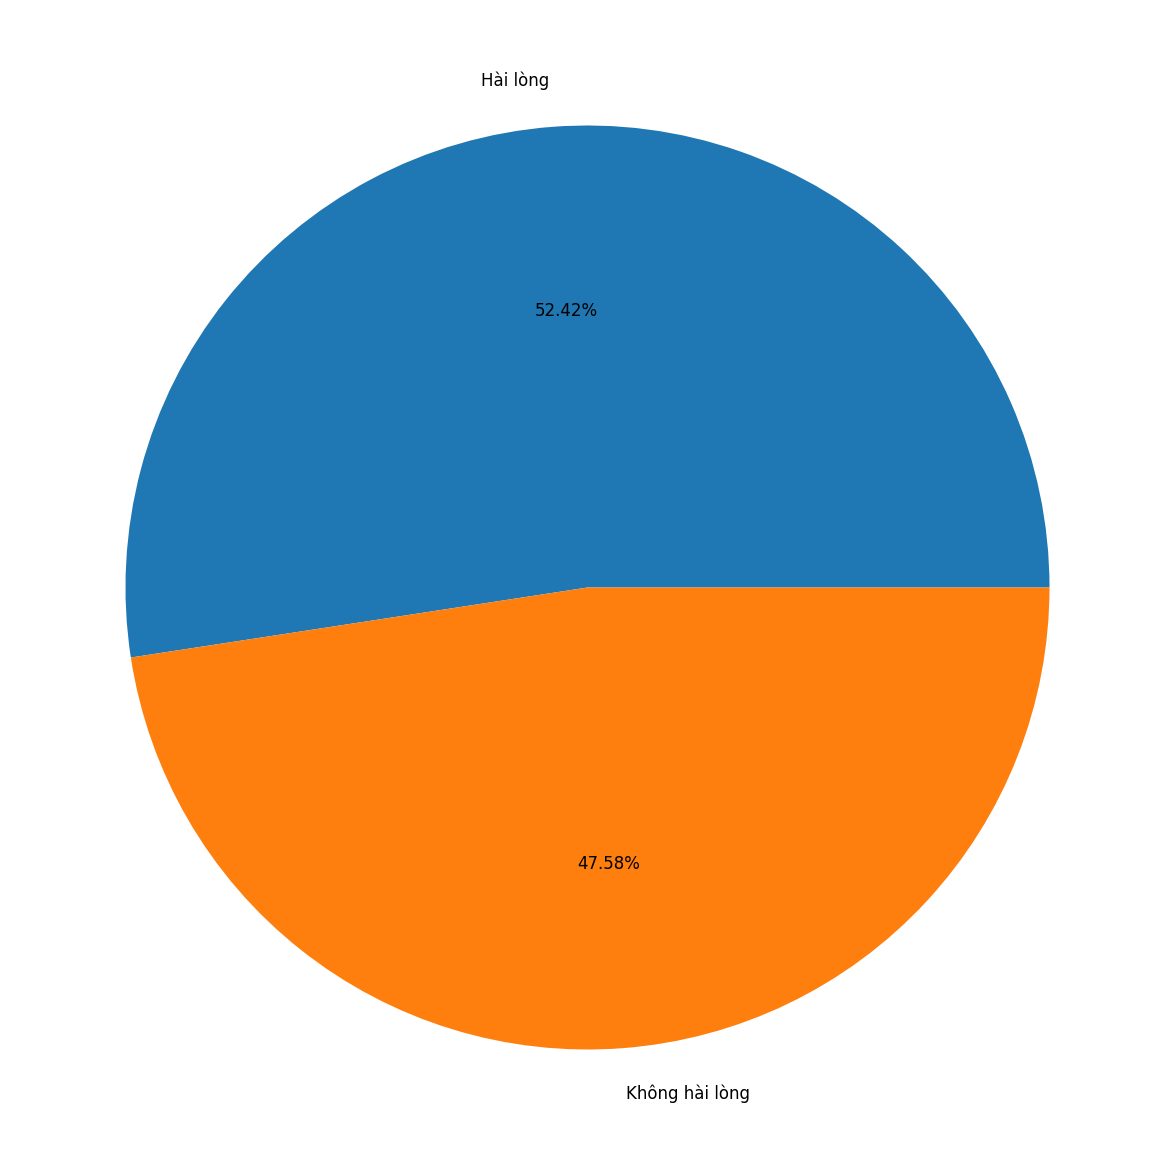

In [13]:
data_label = data['rating']
data_label = pd.DataFrame(data_label, columns=['rating']).groupby('rating').size()
data_label.plot.pie(figsize=(15, 15), autopct="%.2f%%", fontsize=12)

## Xử lí data 

In [15]:
data['comments']=data['comments'].apply(xu_li_text)
data.head(30)

,comments,rating
0,nhanh sách đẹp y chang quảng cáo,Hài lòng
1,nồi to dùng cho gia đình có thành viên là ổn ...,Hài lòng
2,gói hàng khá chắc chắn không bị gãy góc nhìn ...,Hài lòng
3,giao hàng rất nhanh và đóng gói đẹp,Hài lòng
4,tốt,Hài lòng
5,xài ok hàng quốc dân rồi xài trong phòng thì ...,Hài lòng
6,hic bình giữ nhiệt tốt quá từ đến mà nước vẫn...,Hài lòng
7,wifi đã phát ổn định hơn rấy nhiều luôn đóng ...,Hài lòng
8,giao hàng rất nhanh ạ màu gold siêu đẹp sang ...,Hài lòng
9,lần này đóng gói cẩn thận có dán nhãn hàng dễ...,Hài lòng


In [17]:
data.to_csv('Data_DS307_1.csv', index=False)